Задача: Посчитать продажи в разных разрезах и ответить на вопросы

<AxesSubplot:xlabel='city'>

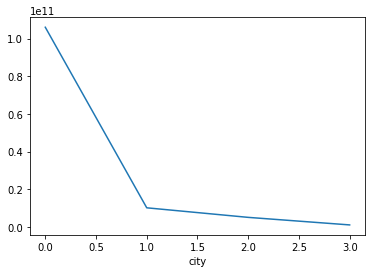

In [4]:
'''В каком городе самые большие продажи?
Здесь нам поможет простая группировка.
Загружаем данные из БД(sqlite) с помощью sqlalchemy и pandas'''
import sqlalchemy as sa
import pandas as pd
import matplotlib.pyplot as plt
engine = sa.create_engine('sqlite:///hw.db')
meta = sa.MetaData()
meta.reflect(bind=engine)

prd_df = meta.tables['t']
sql = sa.select([prd_df])

with engine.connect() as cn:
    df = pd.read_sql(sql, cn)
cn.close()

#с помощью matplotlib строим график продаж по городам

df['date'] = pd.to_datetime(df['date'])
df.groupby('city').sum()['total'].plot()

<AxesSubplot:xlabel='city'>

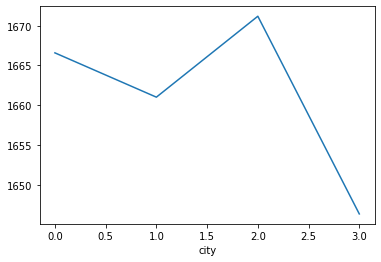

In [5]:
#Есть ли различия в средней цене проданного по городам?

df.groupby('city').sum().assign(avg = lambda x: x.total/x.qty)['avg'].plot()

In [11]:
#Какой товар продаётся лучше всего?

df.groupby('item').sum().sort_values(by='total', ascending=False).head(10)

,index,city,qty,total
item,,,,
257,768617909,224,21245,108625685
94,857753062,379,28504,108144176
1070,818061369,309,25525,107868650
1138,999005350,575,36812,107527852
144,985049862,523,34447,107267958
503,1105231773,719,48345,107035830
516,962710433,502,33672,106874928
375,1040662025,639,41234,106713592
878,1358369590,1147,69810,106669680


<AxesSubplot:>

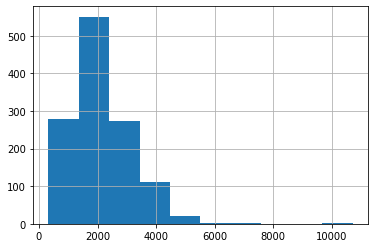

In [14]:
#Как распределена средняя цена проданного товара?

df.groupby('item').sum().assign(avg = lambda x: x.total/x.qty)['avg'].hist()

In [19]:
#Какой товар лучше всего продаётся в июне?

df['month'] = df['date'].dt.month_name()
df[(df['month']=='June')].groupby('item').sum().sort_values(by='total', ascending=False).head(10)

,index,city,qty,total
item,,,,
1151,83067449,59,4120,9925080
1148,74874037,49,3013,9897705
302,71051395,42,3265,9896215
848,66323109,27,2269,9856536
65,100659811,90,4970,9771020
234,82419193,53,3210,9758400
1082,95725409,82,4995,9620370
986,104500061,98,5253,9612990
1015,63475762,23,1993,9490666
